IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       5.0 -0.036849   0.027360    1.475030   0.169236         78.0   
1      25.0 -0.041448   0.026756    1.533863   0.168532         77.0   
2       7.0 -0.042940   0.019510   -0.894137   0.145942         83.0   
3      57.0 -0.044568   0.009104    0.702076   0.105205          0.0   
4      30.0 -0.044876   0.009636    0.541254   0.107819          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   43.0 -0.042699   0.017952   -0.732960   0.140461         91.0   
1345   18.0  0.007105   0.007584   -0.464406   0.087256          0.0   
1346   75.0 -0.009756   0.056919    1.966266   0.238497         97.0   
1347   24.0 -0.117957   0.039775   -0.464927   0.231480         56.0   
1348   52.0 -0.034695   0.020102   -0.192095   0.145795         81.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            77.0    8.089259    4.625110 -0.017003  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.036849   0.027360    1.475030   0.169236         78.0         77.0   
1    -0.041448   0.026756    1.533863   0.168532         77.0         76.0   
2    -0.042940   0.019510   -0.894137   0.145942         83.0         61.0   
3    -0.044568   0.009104    0.702076   0.105205          0.0        108.0   
4    -0.044876   0.009636    0.541254   0.107819          0.0         77.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.042699   0.017952   -0.732960   0.140461         91.0         89.0   
1345  0.007105   0.007584   -0.464406   0.087256          0.0         85.0   
1346 -0.009756   0.056919    1.966266   0.238497         97.0         96.0   
1347 -0.117957   0.039775   -0.464927   0.231480         56.0         79.0   
1348 -0.034695   0.020102   -0.192095   0.145795         81.0        106.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340  0.023199   0.047987    3.059677   0.219992         75.0         74.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   14.671424    7.194008 -0.046644   0.039103  ...       5384.404535   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.780511          0.231265          -0.827439          3.810893   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               157.0               158.0          17.117404   

     amp2(Curr(ESC_5))  Guasto  
340          11.805089       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.036849   0.027360    1.475030   0.169236         78.0         77.0   
1    -0.041448   0.026756    1.533863   0.168532         77.0         76.0   
2    -0.042940   0.019510   -0.894137   0.145942         83.0         61.0   
3    -0.044568   0.009104    0.702076   0.105205          0.0        108.0   
4    -0.044876   0.009636    0.541254   0.107819          0.0         77.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.042699   0.017952   -0.732960   0.140461         91.0         89.0   
1345  0.007105   0.007584   -0.464406   0.087256          0.0         85.0   
1346 -0.009756   0.056919    1.966266   0.238497         97.0         96.0   
1347 -0.117957   0.039775   -0.464927   0.231480         56.0         79.0   
1348 -0.034695   0.020102   -0.192095   0.145795         81.0        106.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.036849   0.027360    1.475030   0.169236    78.000000    77.000000   
1    -0.041448   0.026756    1.533863   0.168532    77.000000    76.000000   
2    -0.042940   0.019510   -0.894137   0.145942    83.000000    61.000000   
3    -0.044568   0.009104    0.702076   0.105205     0.000000   108.000000   
4    -0.044876   0.009636    0.541254   0.107819     0.000000    77.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.002277   0.011471    2.767782   0.106980    57.568428    60.582429   
1616 -0.026533   0.009830    2.283048   0.102509    94.396917    67.931278   
1617 -0.024390   0.007106   -0.531280   0.087652   100.507384    76.261076   
1618 -0.014693   0.006134   -0.325721   0.079583    78.286600    73.491867   
1619  0.002568   0.010970    3.326966   0.104624    66.436792    74.869722   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=70)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=70, score_func=<function f_regression at 0x000002CA42209120>)
[ True  True  True False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
  True False False False  True False  True  True  True  True  True  True
 False False False False False False False False False False  True  True
 False  True  True  True False False False False False  True False  True
  True  True  True  True False False False False False False False False
  True False False  True  True  True  True  True  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False  True False False False  True  True False False  True
 False False False False  True  True False False  True  True False False
  True False  True  True  True  True False False False False  True False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.280715
28         freq1(AccX)  3.487066
12         freq1(GyrY)  3.189833
93   freq2(RPM(ESC_1))  2.837357
92   freq1(RPM(ESC_1))  2.824289
11           RMS(GyrY)  2.791276
9            var(GyrY)  2.656238
153   kurt(RPM(ESC_5))  2.479706
14          amp1(GyrY)  2.437710
159   var(Curr(ESC_5))  1.975479
104     <>(RPM(ESC_2))  1.969631
8             <>(GyrY)  1.829898
22          amp1(GyrZ)  1.804344
78    amp1(RPM(ESC_0))  1.720507
152    var(RPM(ESC_5))  1.712039
107    RMS(RPM(ESC_2))  1.691435
32            <>(AccY)  1.503902
62         amp1(Pitch)  1.235446
80     <>(Curr(ESC_0))  1.088797
17           var(GyrZ)  1.062456
19           RMS(GyrZ)  1.018959
30          amp1(AccX)  0.993707
4          freq1(GyrX)  0.930232
76   freq1(RPM(ESC_0))  0.895499
57          var(Pitch)  0.881140
77   freq2(RPM(ESC_0))  0.748643
15          amp2(GyrY)  0.702643
83    RMS(Curr(ESC_0))  0.692093
156   amp1(RPM(ESC_5))  0.671195
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 25, 26, 27, 29, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 52, 53, 54, 55, 56, 58, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 100, 101, 102, 105, 106, 108, 109, 110, 111, 114, 115, 118, 119, 121, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 162, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  \
0    -0.036849   0.027360    1.475030    78.000000 -0.017003   0.008552   
1    -0.041448   0.026756    1.533863    77.000000 -0.011517   0.009121   
2    -0.042940   0.019510   -0.894137    83.000000  0.015934   0.003177   
3    -0.044568   0.009104    0.702076     0.000000  0.054275   0.004896   
4    -0.044876   0.009636    0.541254     0.000000  0.050039   0.004899   
...        ...        ...         ...          ...       ...        ...   
1615 -0.002277   0.011471    2.767782    57.568428  0.065748   0.011340   
1616 -0.026533   0.009830    2.283048    94.396917 -0.008498   0.006194   
1617 -0.024390   0.007106   -0.531280   100.507384  0.046001   0.012534   
1618 -0.014693   0.006134   -0.325721    78.286600  0.042700   0.013105   
1619  0.002568   0.010970    3.326966    66.436792  0.066225   0.011649   

      RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  ...  kurt(RPM(ESC_4))  \
0      0.093902    7

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  \
340  0.023199   0.047987    3.059677         75.0 -0.046644   0.039103   

     RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  ...  kurt(RPM(ESC_4))  \
340   0.202913          0.0   36.018392    6.630036  ...         -1.323063   

     kurt(Curr(ESC_4))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  \
340           -1.48014    448746.126656         -0.486134        9480.80502   

     amp2(RPM(ESC_5))  <>(Curr(ESC_5))  var(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340       5384.404535         3.780511          0.231265          3.810893   

     freq2(Curr(ESC_5))  
340               158.0  

[1 rows x 70 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  \
0    -0.036849   0.027360    1.475030    78.000000 -0.017003   0.006975   
1    -0.041448   0.026756    1.533863    77.000000 -0.011517   0.007137   
2    -0.042940   0.019510   -0.894137    83.000000  0.015934   0.006485   
3    -0.044568   0.009104    0.702076     0.000000  0.054275   0.006010   
4    -0.044876   0.009636    0.541254     0.000000  0.050039   0.006226   
...        ...        ...         ...          ...       ...        ...   
1615 -0.002277   0.011471    2.767782    57.568428  0.065748   0.004452   
1616 -0.026533   0.009830    2.283048    94.396917 -0.008498   0.004624   
1617 -0.024390   0.007106   -0.531280   100.507384  0.046001   0.008196   
1618 -0.014693   0.006134   -0.325721    78.286600  0.042700   0.008652   
1619  0.002568   0.010970    3.326966    66.436792  0.066225   0.004423   

      kurt(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  ...  var(Curr(ESC_1))  \
0      -1.001582   0.16

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  \
340  0.023199   0.047987    3.059677         75.0 -0.046644   0.020126   

     kurt(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  ...  var(Curr(ESC_1))  \
340   -1.687782   0.218161     1.86287  0.071148  ...          1.027177   

     RMS(Curr(ESC_1))  amp2(Curr(ESC_1))  var(Curr(ESC_2))  \
340          3.073783          25.764462          0.336639   

     freq1(Curr(ESC_2))  kurt(RPM(ESC_3))  kurt(Curr(ESC_3))  \
340               114.0         -0.871119          -0.703774   

     kurt(RPM(ESC_4))  amp2(RPM(ESC_5))  freq2(Curr(ESC_5))  
340         -1.323063       5384.404535               158.0  

[1 rows x 29 columns]


In [ ]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [42]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 29)
(324, 29)
(1296, 1)
(324, 1)


In [43]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [44]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.83846154 0.84555985 0.86100386 0.84555985 0.82625483]
Accuracy: 0.84 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.60769231 0.62548263 0.65637066 0.64478764 0.67567568]
Accuracy: 0.66 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.75       0.63706564 0.81467181 0.84942085 0.76061776]
Accuracy: 0.81 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.41153846 0.75675676 0.59459459 0.58301158 0.65250965]
Accuracy: 0.56 	 ---> SGDClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

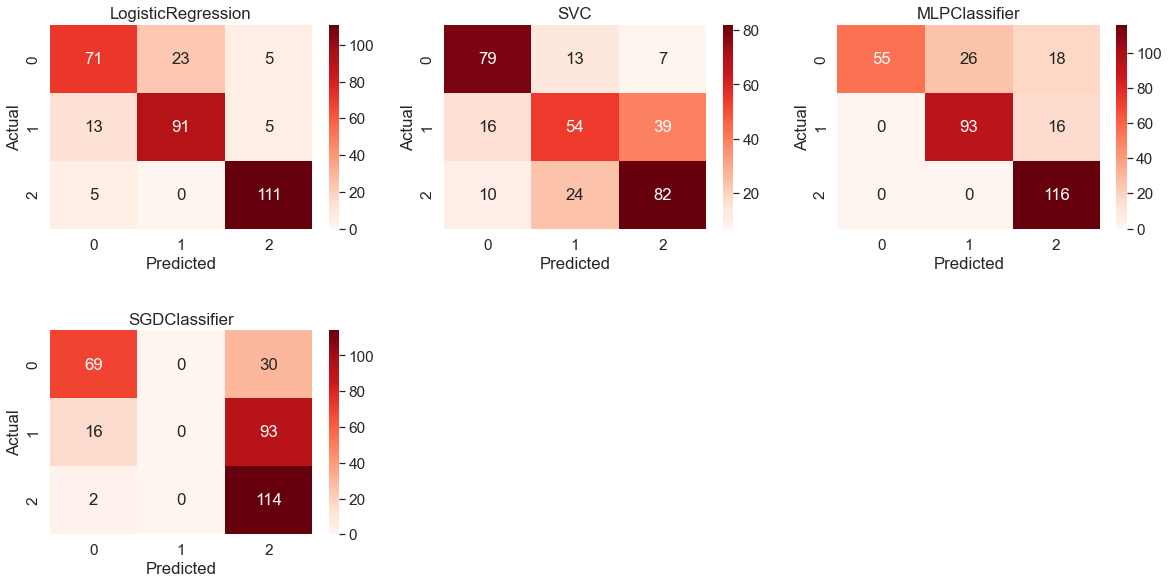

In [45]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Score

Text(0.5, 1.0, 'Cross validation scores')

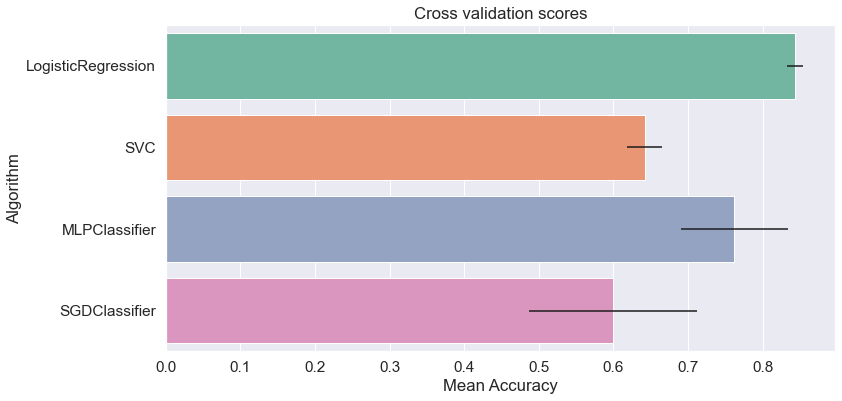

In [46]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [47]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.80      0.83      0.82       109
           2       0.92      0.96      0.94       116

    accuracy                           0.84       324
   macro avg       0.84      0.84      0.84       324
weighted avg       0.84      0.84      0.84       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.50      0.54       109
           2       0.64      0.71      0.67       116

    accuracy                           0.66       324
   macro avg       0.66      0.67      0.66       324
weighted avg       0.66      0.66      0.66       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71        99
           1       0.78